$$\require{mhchem}$$       

# Non-isothermal batch reactor design

The exothermic elementary liquid phase reaction
\begin{align}
\ce{A + B <->[k,K] C + D}\\
\end{align}
is carried out in a batch reactor with a cooling coil to keep the reactor isothermal at 40 C. The reactor is initially charged with equal concentrations of A and B and no C or D, $C_{A0}=C_{B0}=2$mol/L.  

$k=0.1$ L/mol/min at 40 C, $K=2$ at 40 C

$\Delta H_R=-20$ kcal/mol A at 40 C

Partial molar heat capacities $C_{pA}=C_{pB}=C_{pC}=C_{pD}=20$cal/mol/K

Activation energy for the reaction $E_a=1000 cal/mol/K$. 

Reactor volume 1200 L

#### How long does it take to reach 50% conversion? Also show a plot of concentration of all species vs time.

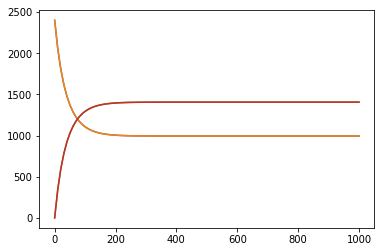

In [7]:
import numpy as np
V=1200 #L
Ea=1 #kcal/mol/K
dHr=-20 #kcal/mol
Cp=20 #cal/mol/K
k=10 #L/mol/min
K=2
Ca0=2 #mol/L
Cb0=2#mol/L
Cc0=0#mol/L
Cd0=0#mol/L
T=40
def dNdt(N,t):
    C=N/V
    Ca,Cb,Cc,Cd=C
    rate=k*Ca*Cb-k/K*Cc*Cd
    dNdt=[-rate,-rate,rate,rate]
    return dNdt

from scipy.integrate import odeint
trange=np.linspace(0,1000,100)
sol=odeint(dNdt,np.array([Ca0,Cb0,Cc0,Cd0])*V,trange)

import matplotlib.pyplot as plt
plt.plot(trange,sol)
plt.show()

#### What is the total amount of heat (kcal) that must be removed by the cooling coil when the conversion is reached?

#### What is the maximum rate at which heat must be removed by the cooling coil, and at what time does this occur?

#### Now consider a non-isothermal version of this reactor.  There is a cooling bath around the reactor with a total heat transfer coefficient $Ua=300$ kcal/L/min. The reactor starts at 40 C  What is the maximum temperature $T_0$ that you can keep the cooling bath such that the temperature in the batch reactor rises no higher than 60C?



# PBR with internal mass transfer and heat drops

You have a isomerization catalytic reactor with the following kinetics:
\begin{align*}
\ce{A + S <->[K_A] AS}\\
\ce{AS ->[k] BS}\\
\ce{BS -> B + S}
\end{align*}
The surface step is limiting and you derive the following rate law:
\begin{align*}
r= k \overline{c}_m \frac{K_A c_A}{1 + K_A c_A}
\end{align*}
The reactor is a 500 L CSTR with 5 kg of catalyst particles.  The catalyst particles are 20 mm diameter, the rate constant for the surface step is 100/s/g$_{cat}$, the activation energy for the surface step is $20$ kcal/mol, the heat of reaction for the first adsorption step is $\Delta H_R=-5$kcal/mol (assume temperature independent), the heat of reaction for the full reaction \ce{A->B} is -10 kcal/mol, and the equilibrium coefficient at 200 C is 2. The specific heat of A and B are both 10 cal/molK. The diffusion coefficient at 200 C for A in the particle is 0.1 cm$^2/s$ at 200 C and scales with temperature as $D=D_0(T/T0)^{3/2}$. The pressure drop in the reactor is negligible. The reactor is fed with $4 mol/L$ A at 1 L/s at 200 C. The catalyst site density is $C_m=10^{-2}$ mol/gcat. The reactor is adiabatic (no heat transfer). 

You may assume that the solution for a sphere applies $ \eta = \frac{1}{\Phi}  \left [\frac{1}{\tanh 3 \Phi} - \frac{1}{3 \Phi} \right]$, using the correct $\Phi$ for this problem / rate law.

#### Calculate the exit concentration of the CSTR for an inlet feed at 200 C

In [56]:
import numpy as np

E=20 #kcal/mol
R=0.001987 #kcal/mol/K
dH_ads=-5 #kcal/mol
dH_tot=5 #kcal/mol
T0=200+273.15
Tfeed=200+273.15
k0=100 #g_{cat}/L/s
Ka0=2
D0=0.1 #cm^2/s
Cm=1.e-2 #mol/g_cat
diameter=2 #cm 
a=diameter/6 #cm, a=R/3
Ca0=4 #mol/L
v0=1 #L/s
W=5000 #g_cat
Cpa=10./1000 #kcal/mol/K
def tempDepParams(T):
    k=k0*np.exp(-E/R*(1/T-1/T0))#1/s/g cat
    Ka=Ka0*np.exp(-dH_ads/R*(1/T-1/T0))
    D=D0*(T/T0)**(3/2)
    return k,Ka,D

def thiele_mod(T,Cas):
    k,Ka,D=tempDepParams(T)
    phi=Ka*Cas
    Phi_tilde=np.sqrt(k*Cm*Ka*a**2/D)
    Phi=(phi/(1+phi))*1/np.sqrt(2*(phi-np.log(1+phi)))*Phi_tilde
    return Phi

def effectiveness_factor(T,Cas):
    thiele=thiele_mod(T,Cas)
    return 1/thiele*(1/np.tanh(3*thiele)-1/3/thiele)

def objfun(x):
    T,Ca=x
    eta=effectiveness_factor(T,Ca)
    k,Ka,D=tempDepParams(T)
    rate=eta*k*Cm*Ka*Ca/(1+Ka*Ca)
    mol_balance=v0*(Ca0-Ca)-rate*W
    energy_balance=v0*Ca0*Cpa*(Tfeed-T)-dH_tot*rate*W
    return mol_balance,energy_balance

from scipy.optimize import fsolve
sol=fsolve(objfun,[273.15,4])
print(objfun(sol))
print('T=%f K, Ca=%f mol/L' %(sol[0],sol[1]))

(6.4155347700989296e-12, 3.2078339984309423e-11)
T=338.919746 K, Ca=2.926158 mol/L


#### Calculate the exit concentration as a function of temperature of the inlet feed

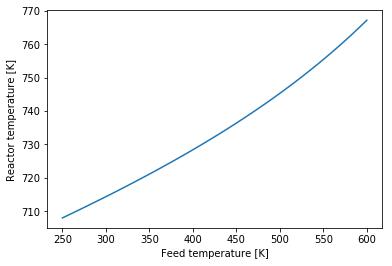

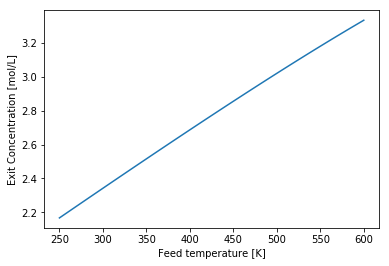

In [3]:
from scipy.optimize import fsolve
Tfeedrange=np.linspace(250,600,100)

save=[]
for Tfeed in Tfeedrange:
    sol=fsolve(objfun,[200+273.15,2])
    save.append(sol)
    
T,C=zip(*save)
import matplotlib.pyplot as plt
plt.plot(Tfeedrange,T)
plt.ylabel('Reactor temperature [K]')
plt.xlabel("Feed temperature [K]")
plt.show()

plt.plot(Tfeedrange,C)
plt.ylabel('Exit Concentration [mol/L]')
plt.xlabel("Feed temperature [K]")
plt.show()